## Font group classification using KNN

#### Imports and constants

In [ ]:
# Common imports
import os
import glob
import numpy as np
import ipyplot
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn import metrics
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt

In [ ]:
proj_dir = 'shared/FAU Study/Project/PR Project'

data_dir = os.path.join(
    os.path.expanduser('~'),
    proj_dir,
    'Data/ICDAR2017_CLaMM_task1_task3/'
)

label_file_path = os.path.join(
    data_dir,
    '@ICDAR2017_CLaMM_task1_task3.csv'
)

font_group_map = {1: 'Caroline', 2: 'Cursiva', 3: 'Half-Uncial', 4: 'Humanistic', 5: 'Humanistic Cursive', 6: 'Hybrida', 7: 'Praegothica', 8: 'Semihybrida', 9: 'Semitextualis', 10: 'Southern Textualis', 11: 'Textualis', 12: 'Uncial'}

#### Utility functions

#### Dataset


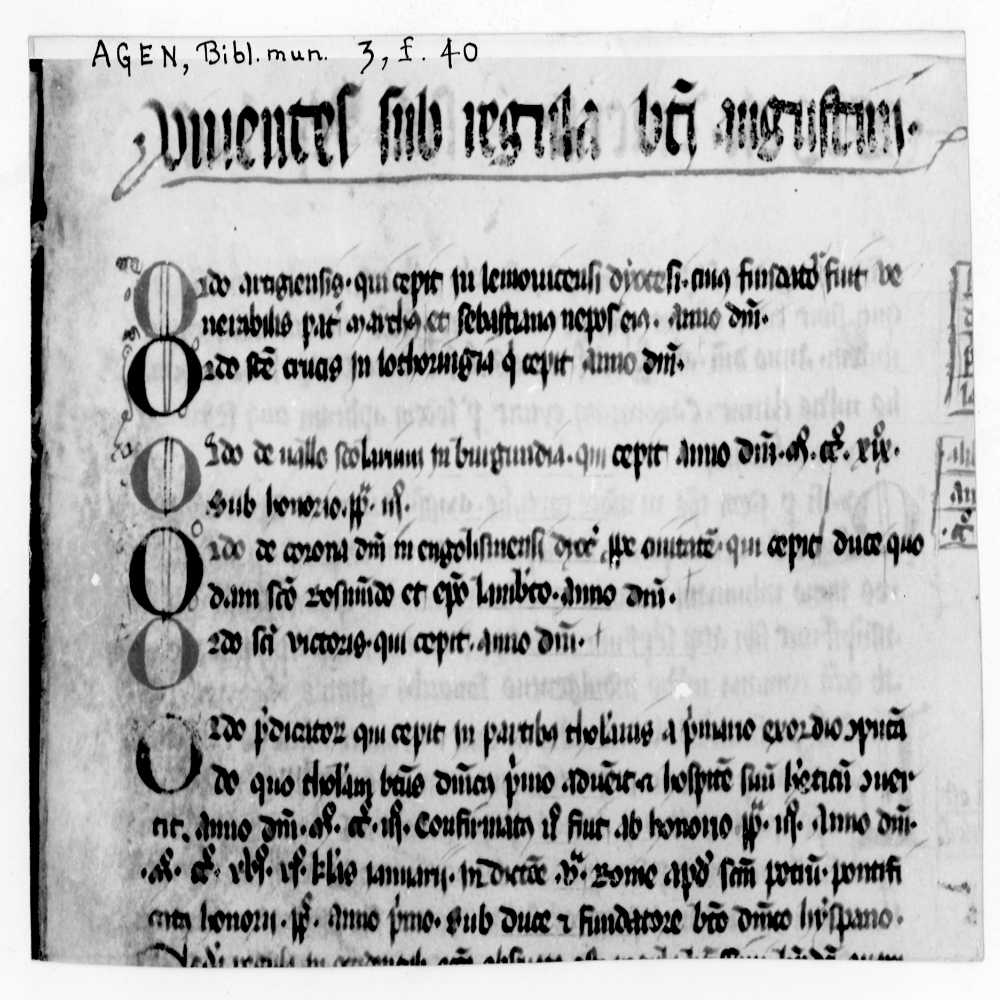
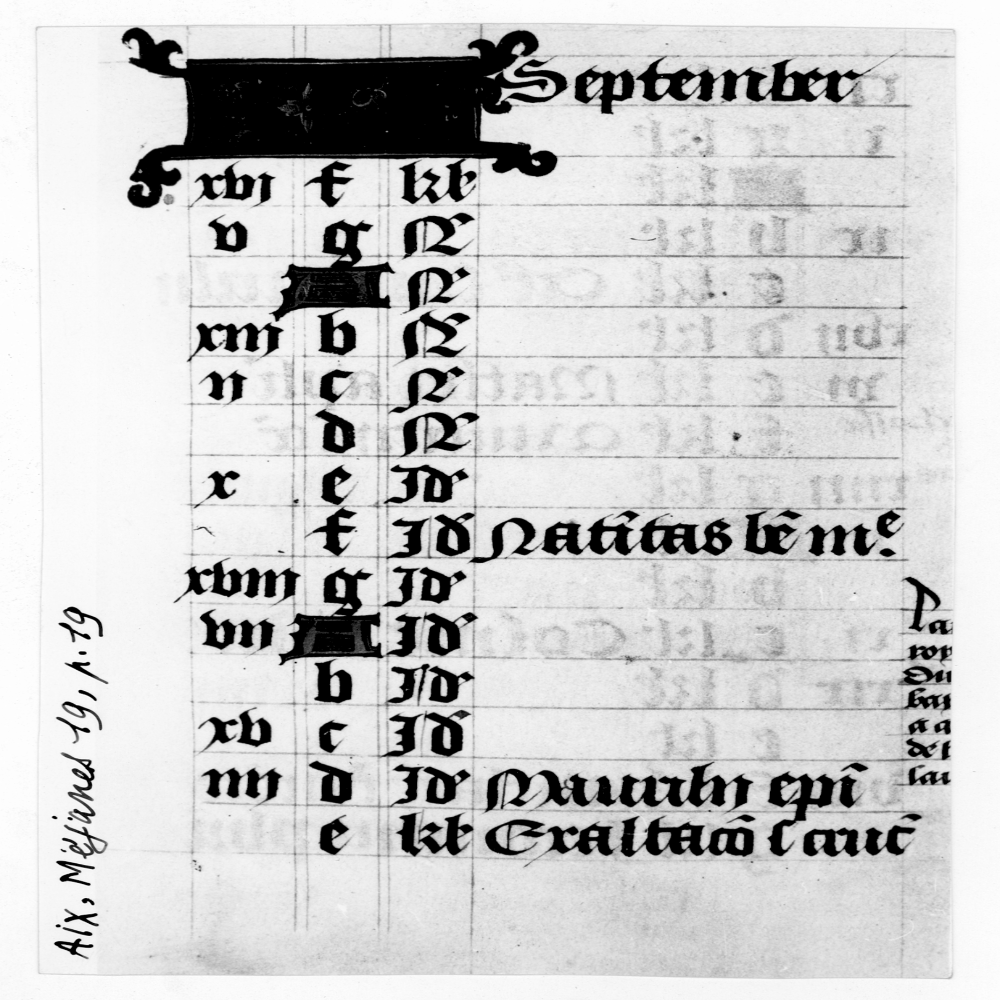
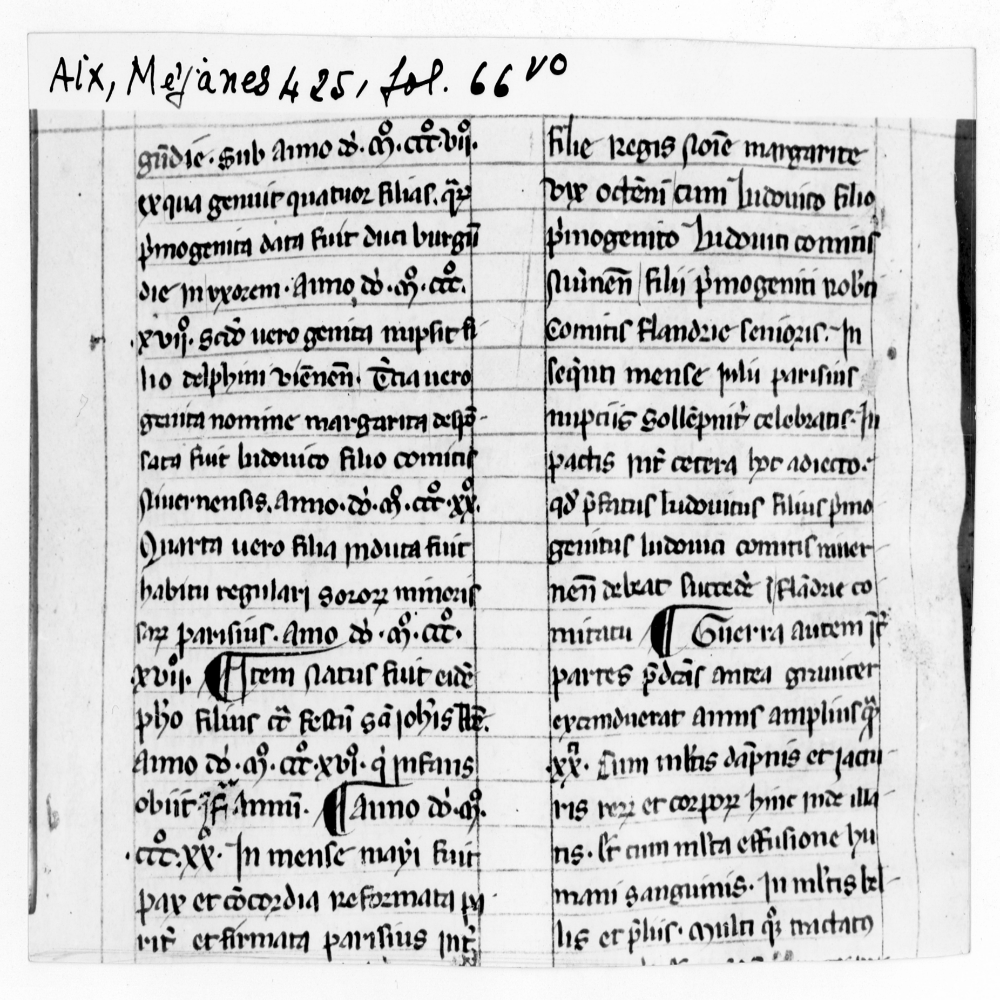
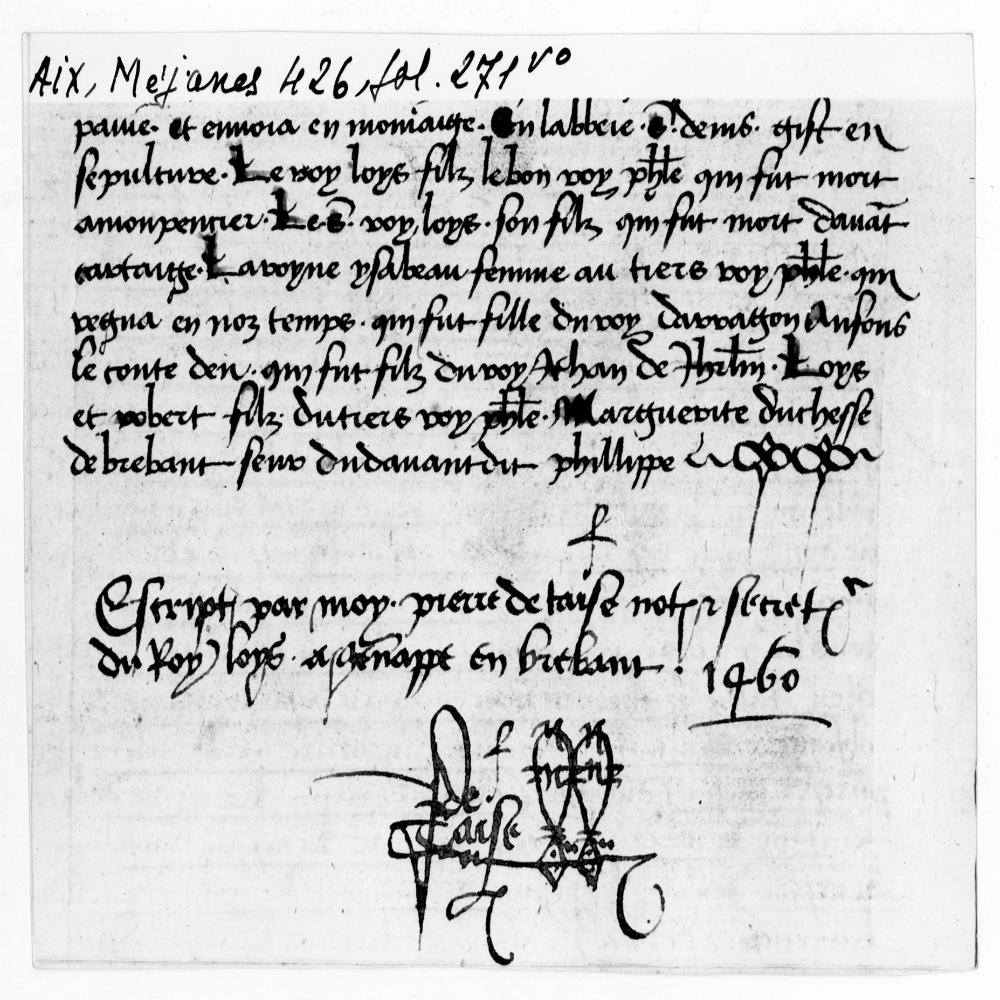
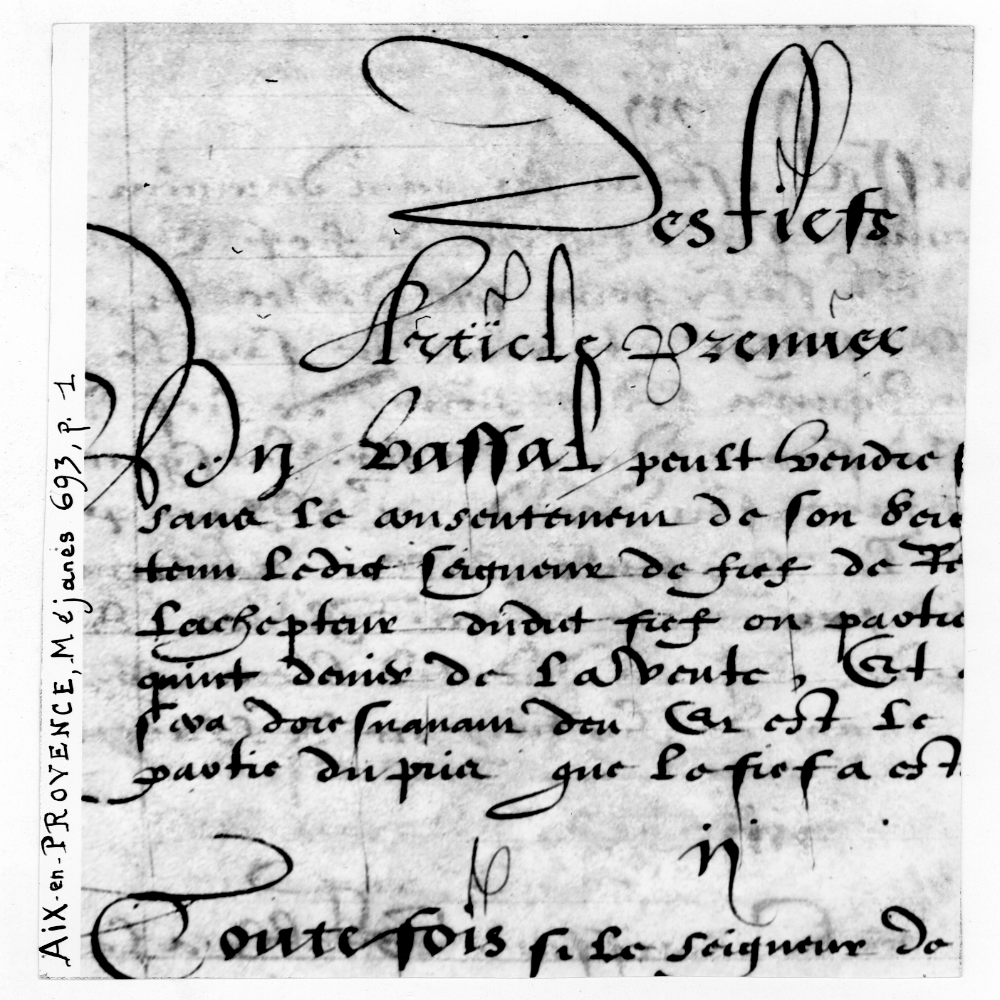


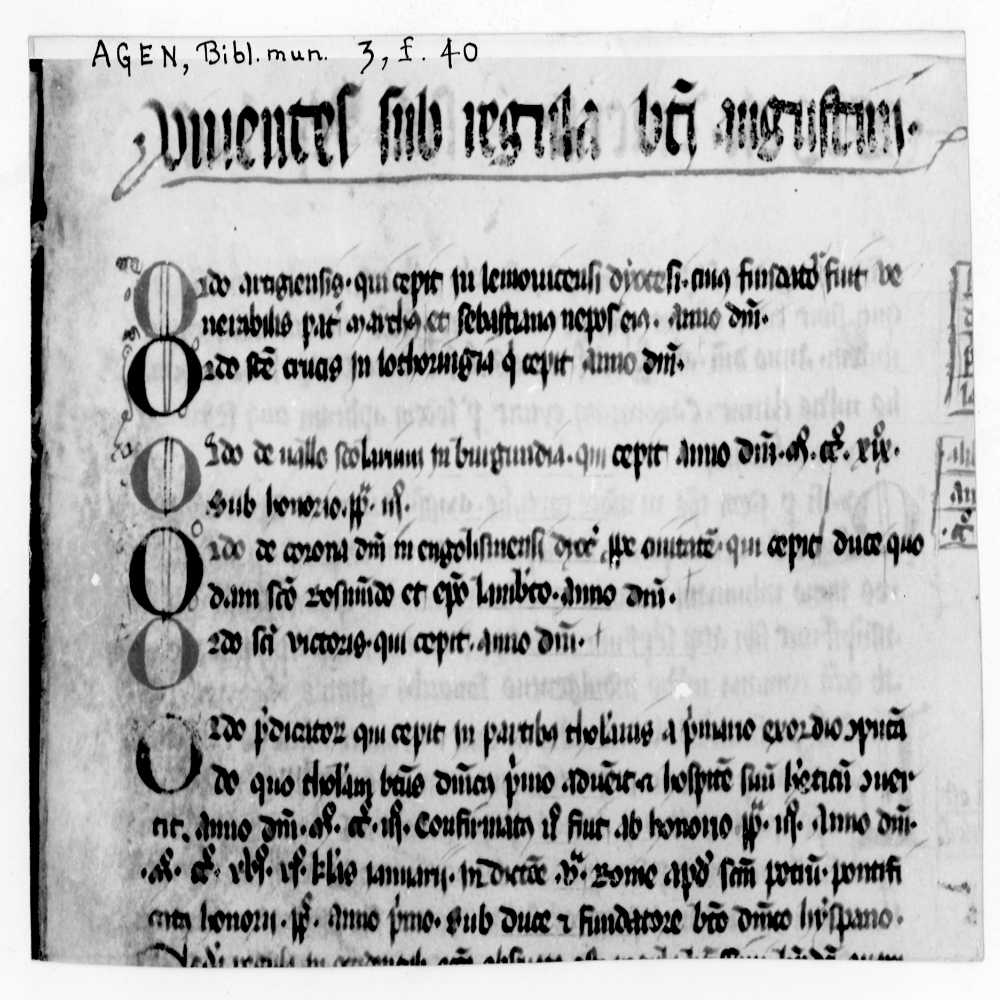
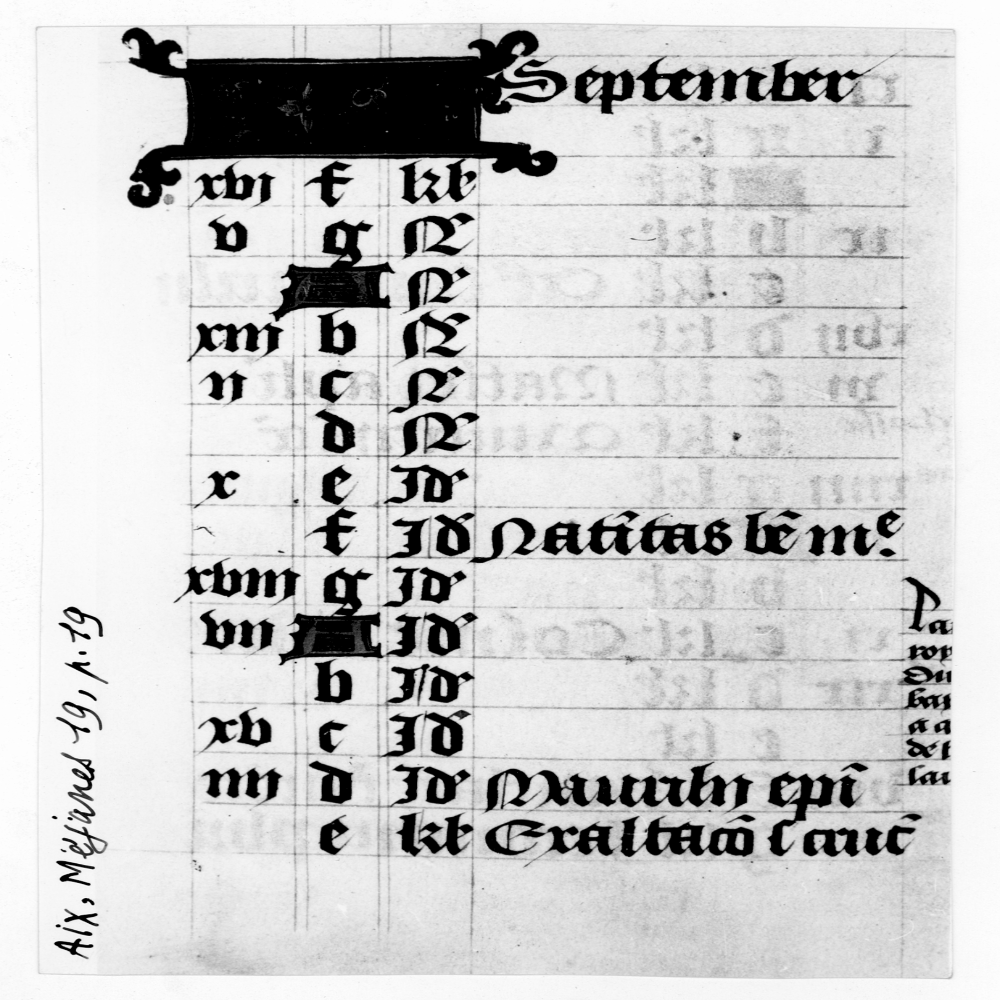
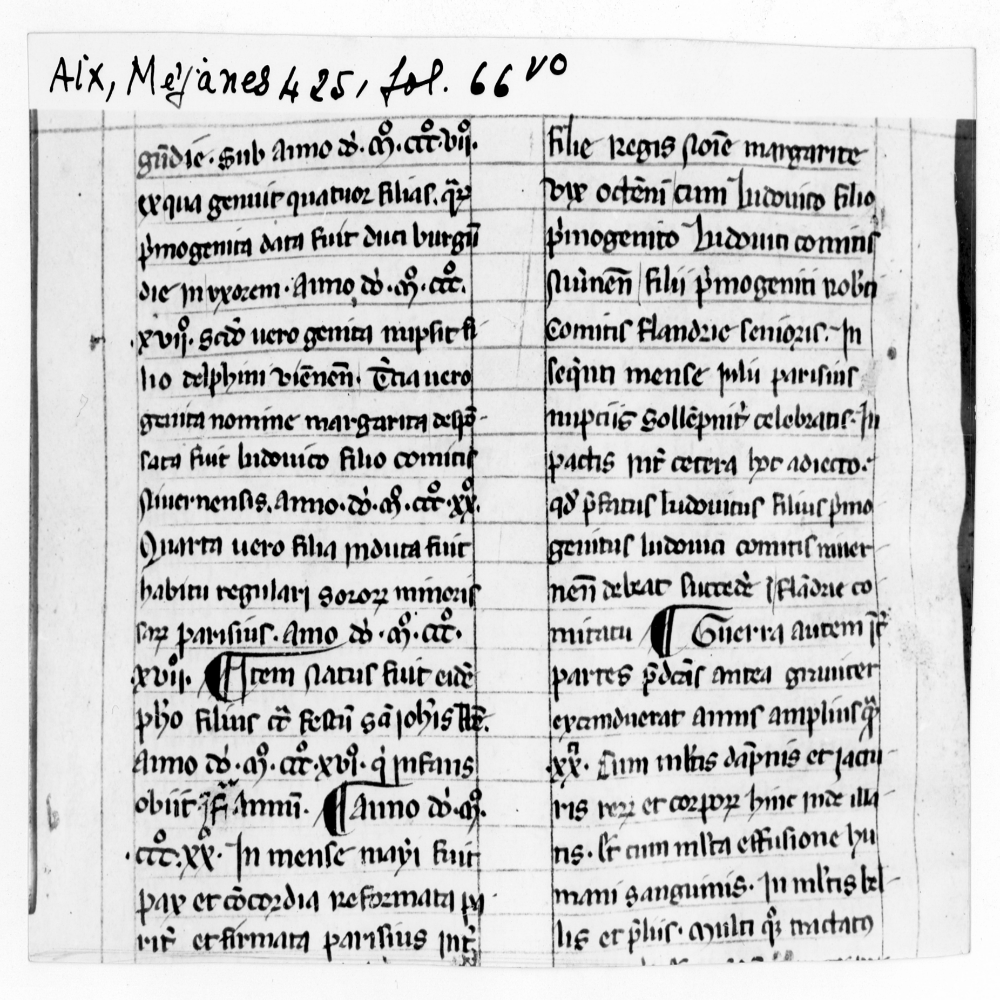
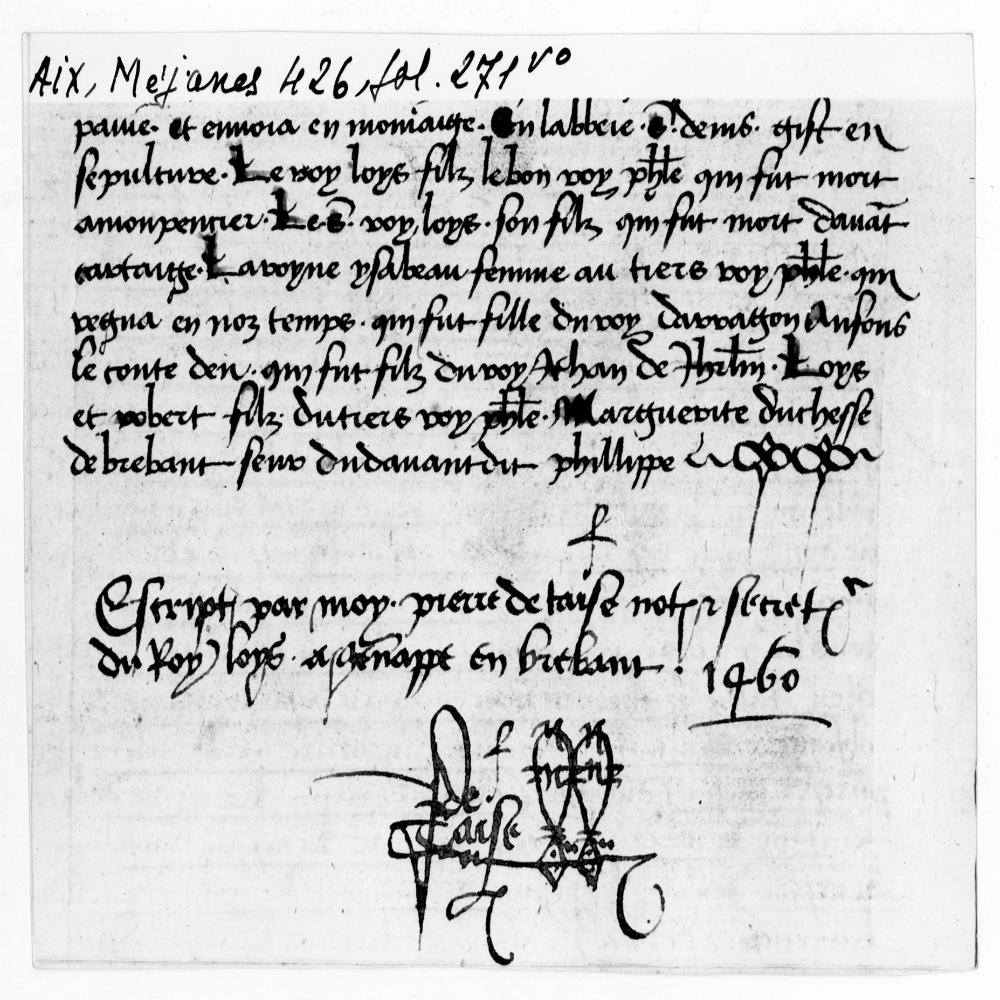
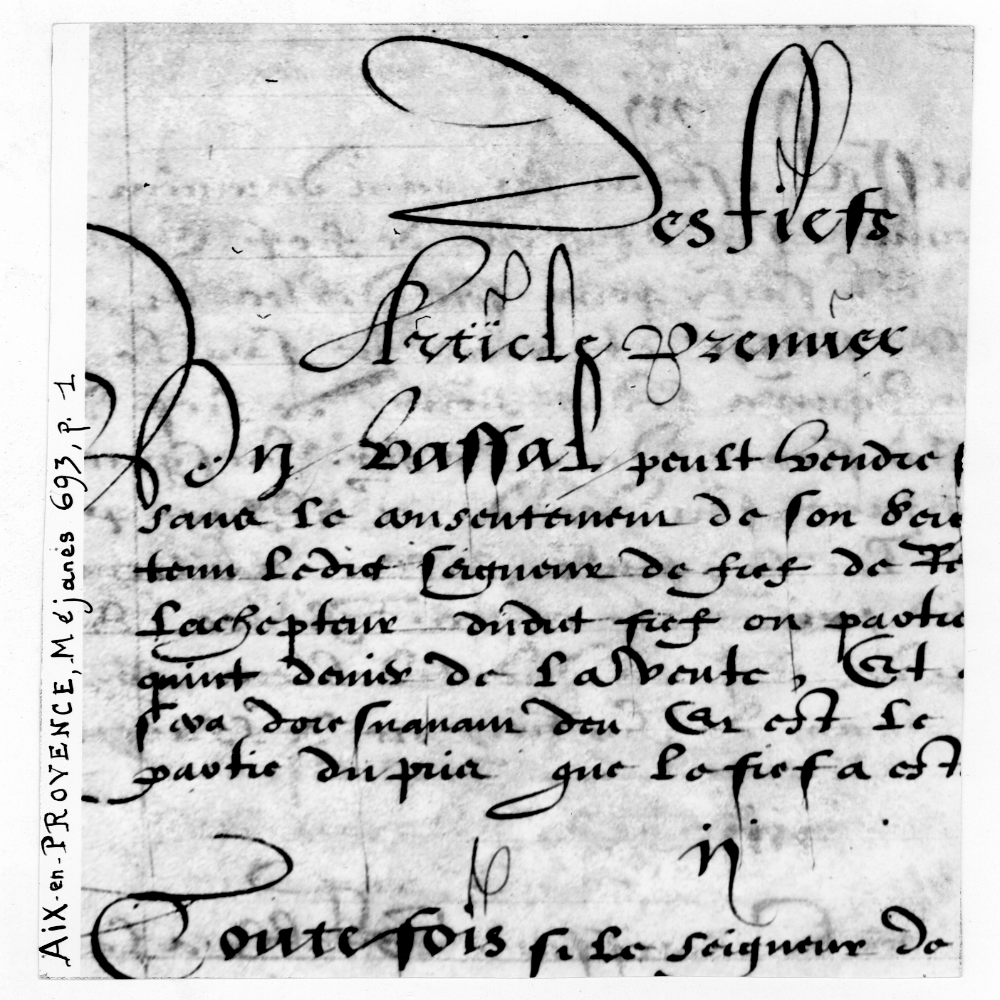

In [ ]:
# Class imbalance check
class_count = label_df['Script_type_ICDAR2017'].value_counts()
class_count.index = class_count.index.map(font_group_map)
class_count

Caroline              58
Textualis             13
Praegothica           11
Semitextualis          7
Cursiva                6
Uncial                 2
Hybrida                1
Semihybrida            1
Humanistic Cursive     1
Name: Script_type_ICDAR2017, dtype: int64


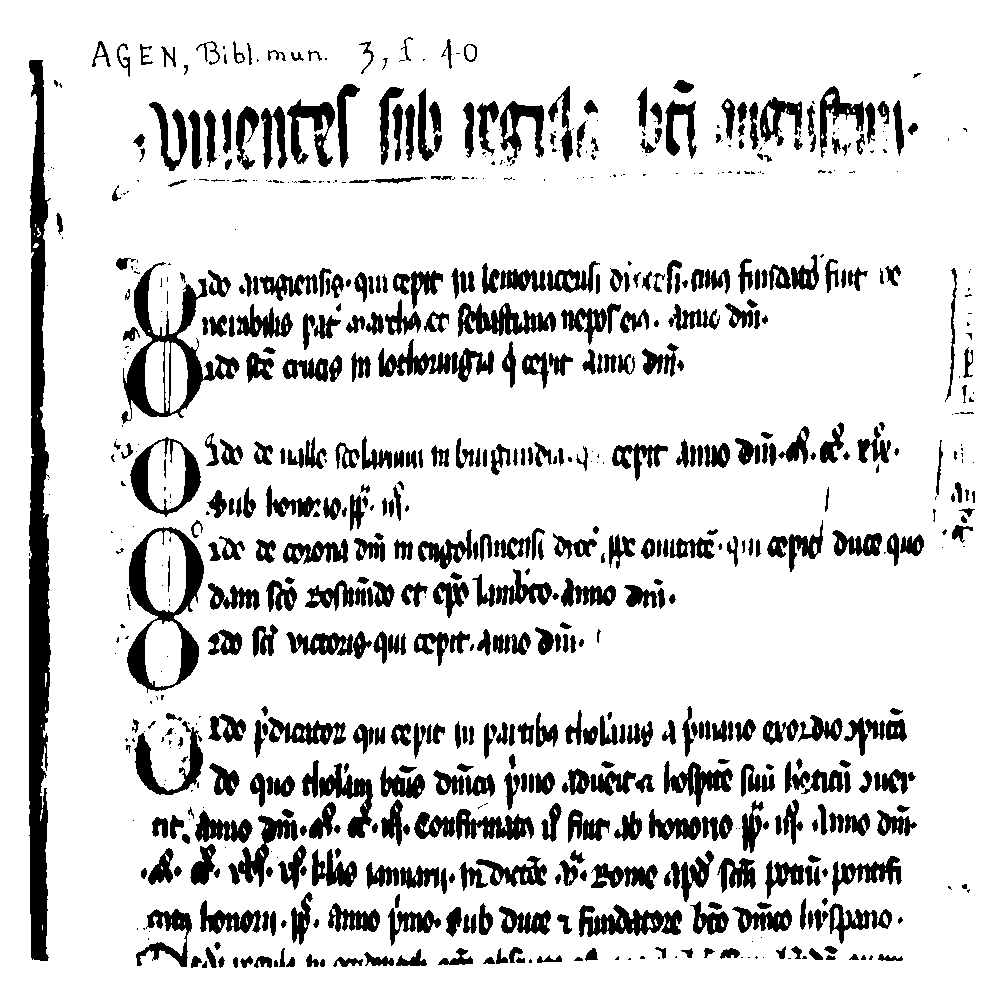
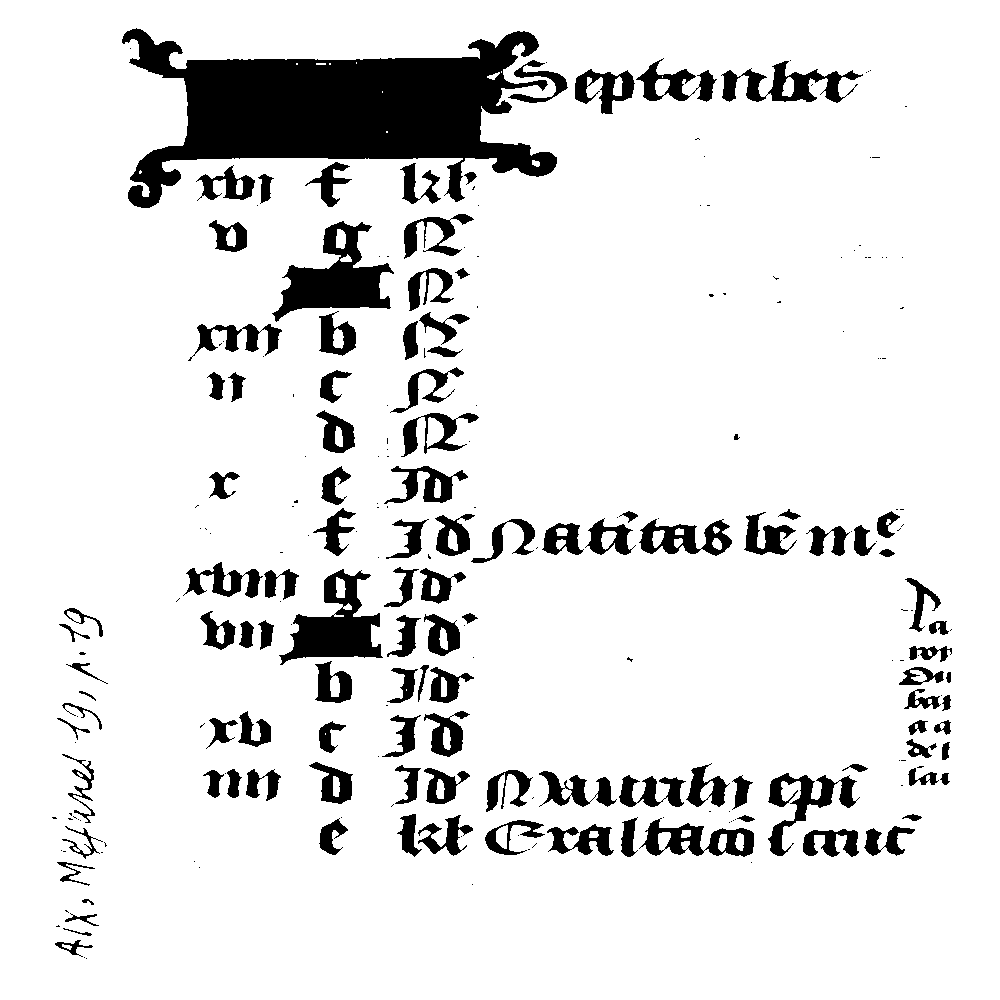
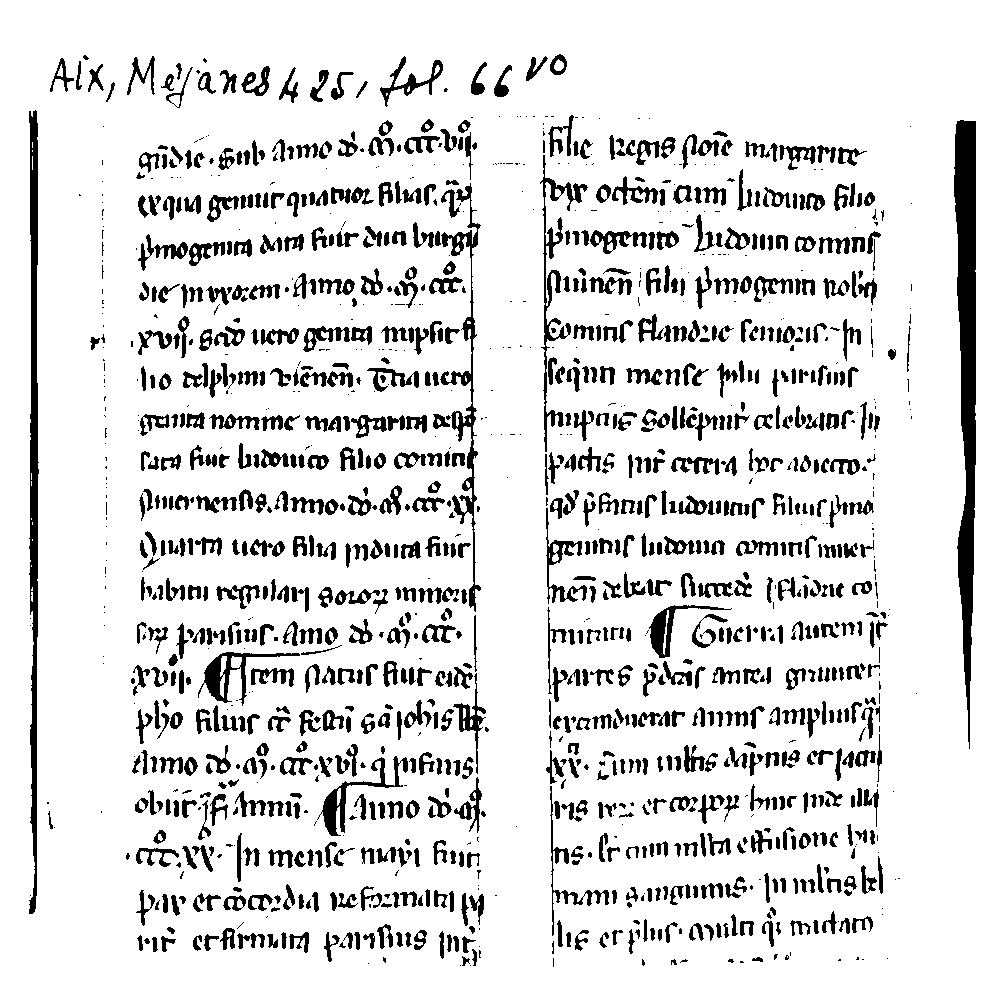
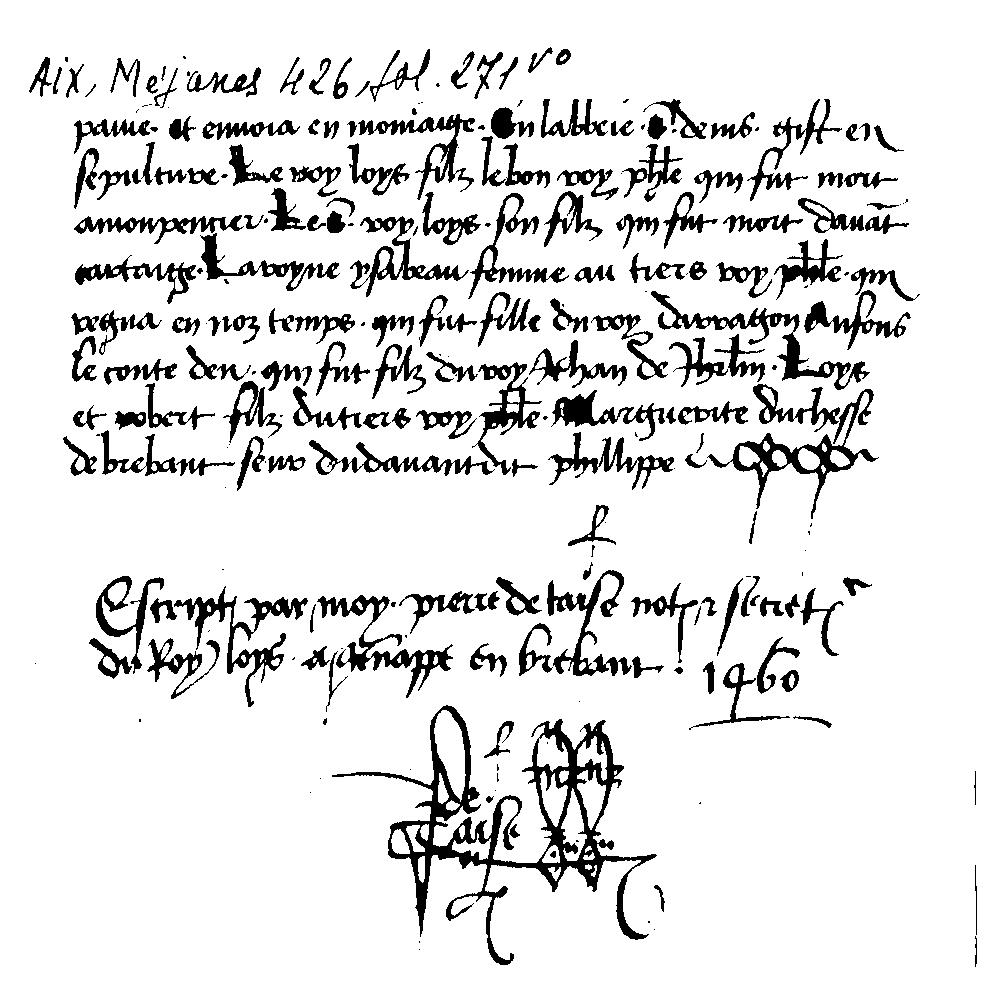
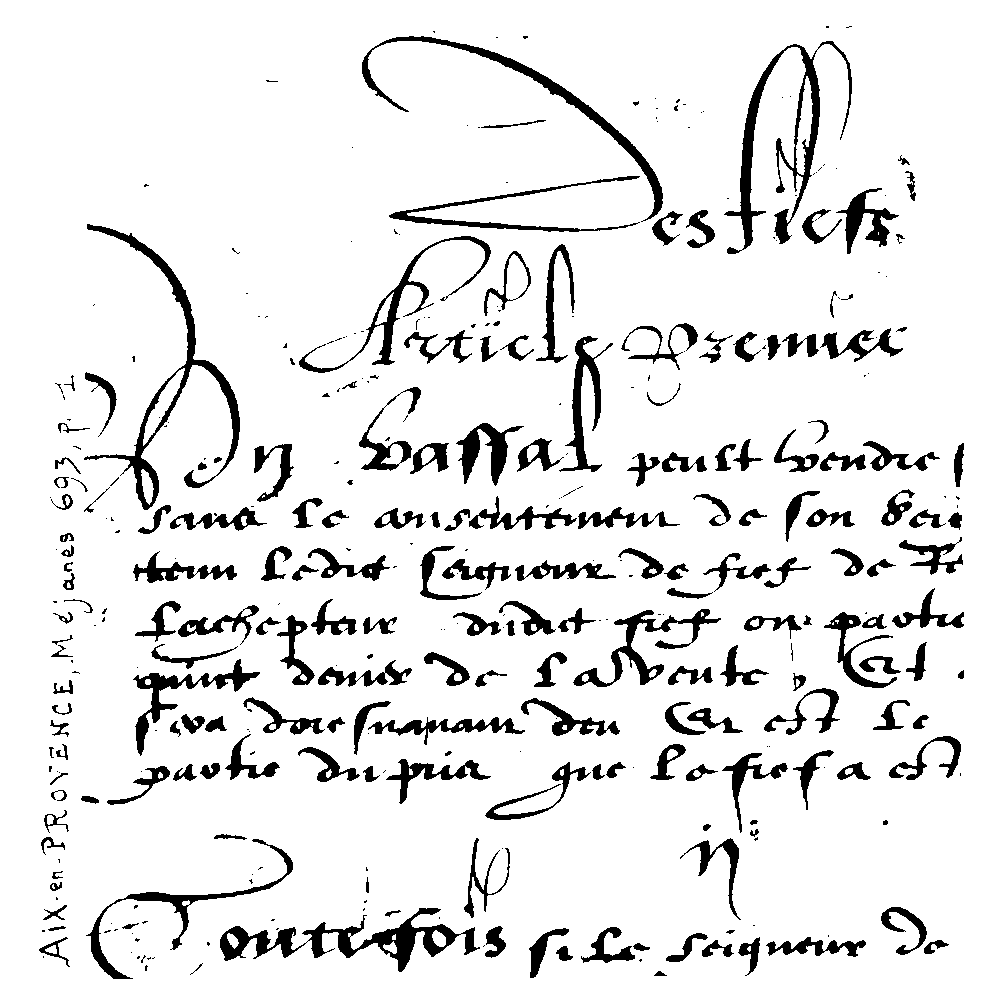
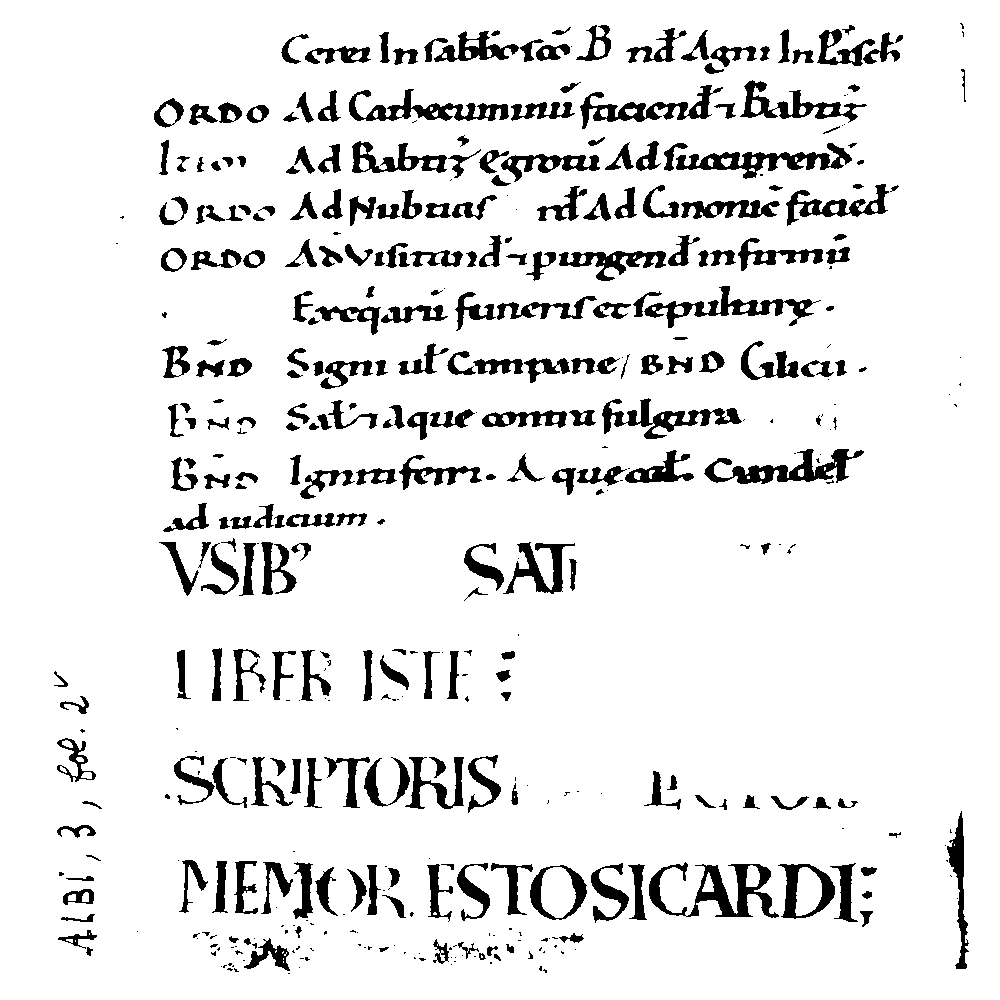
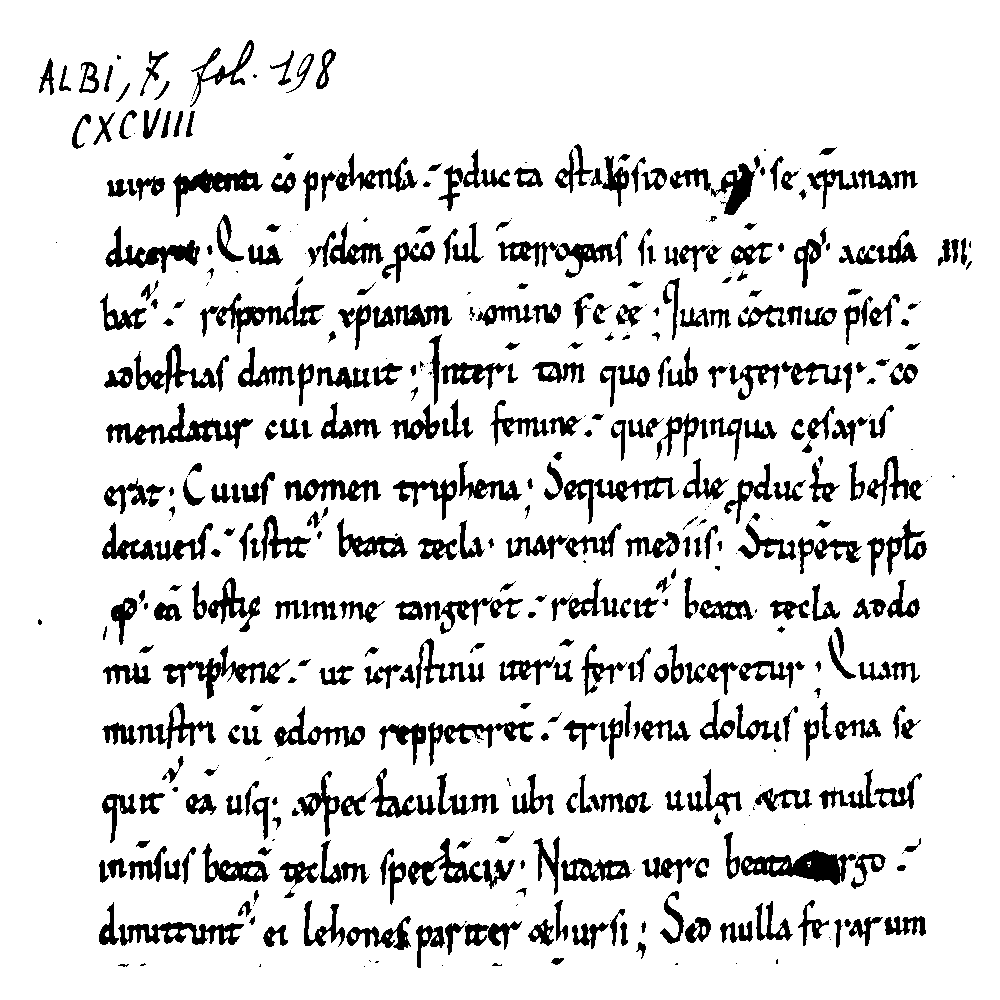
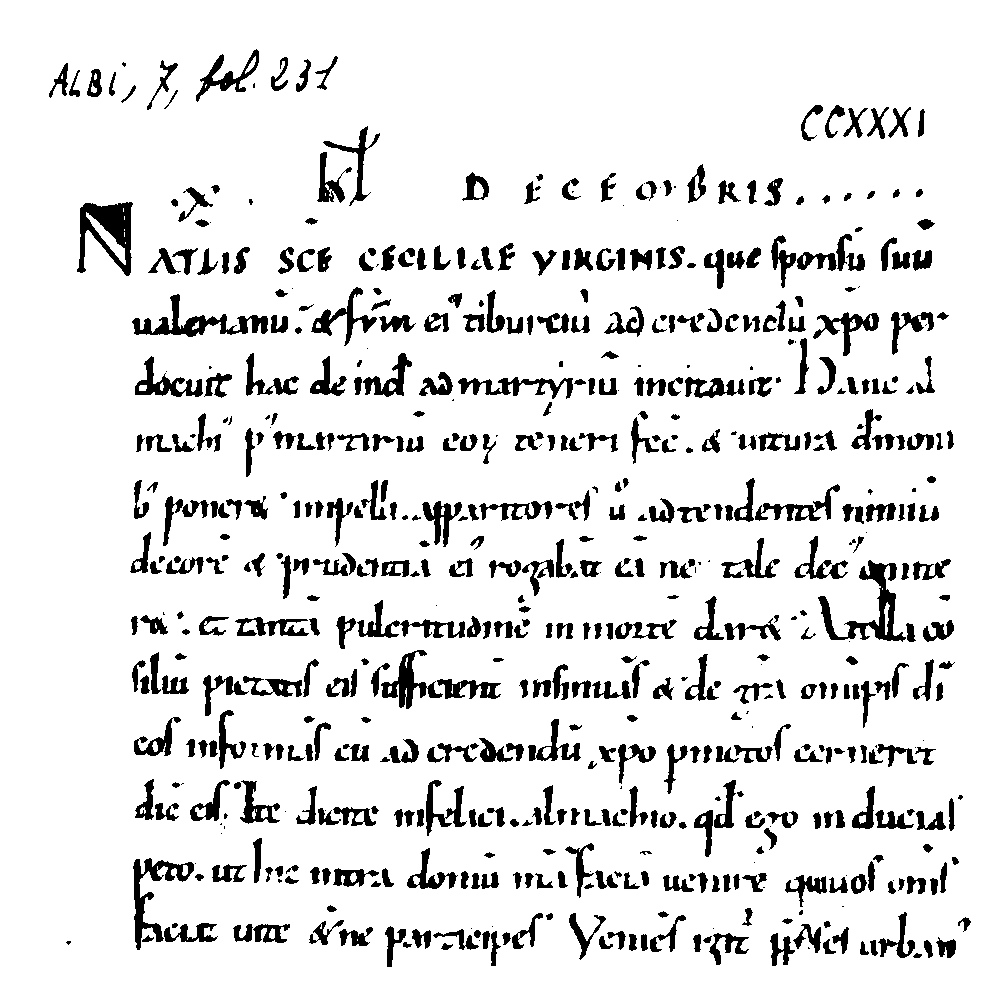
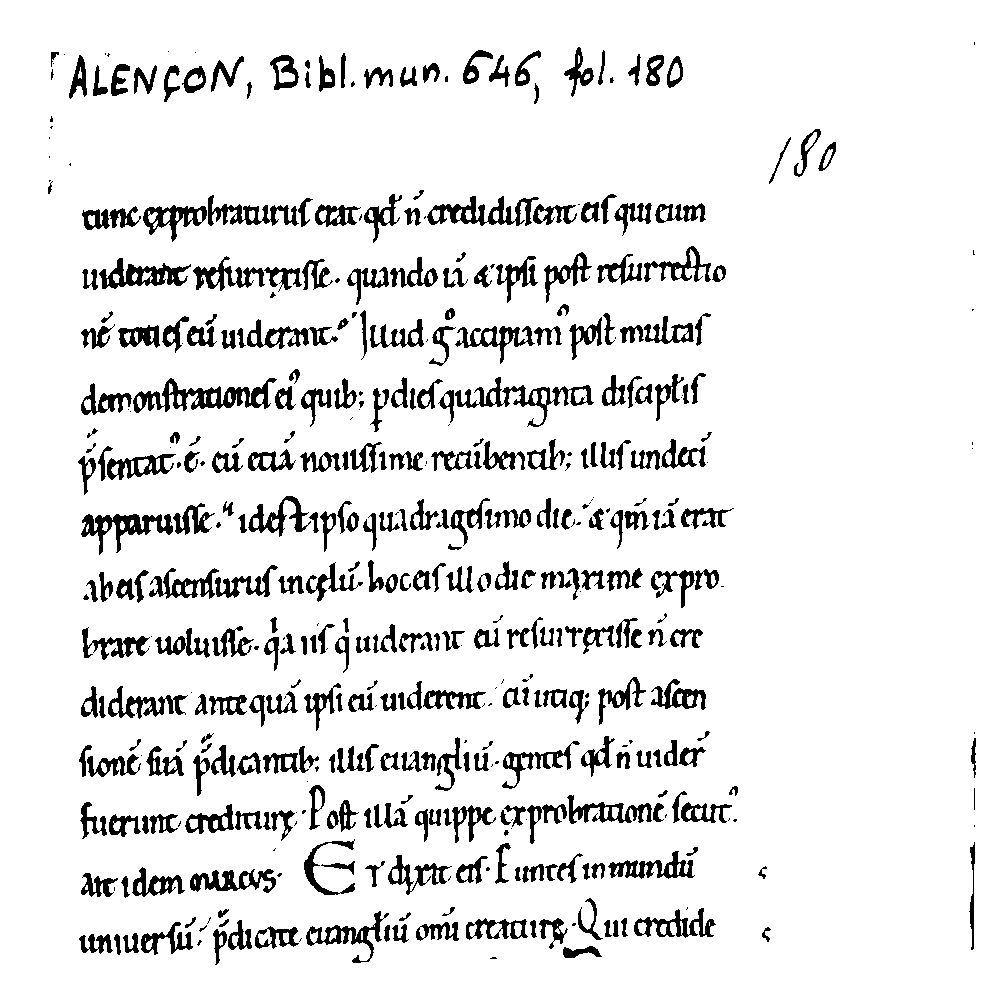
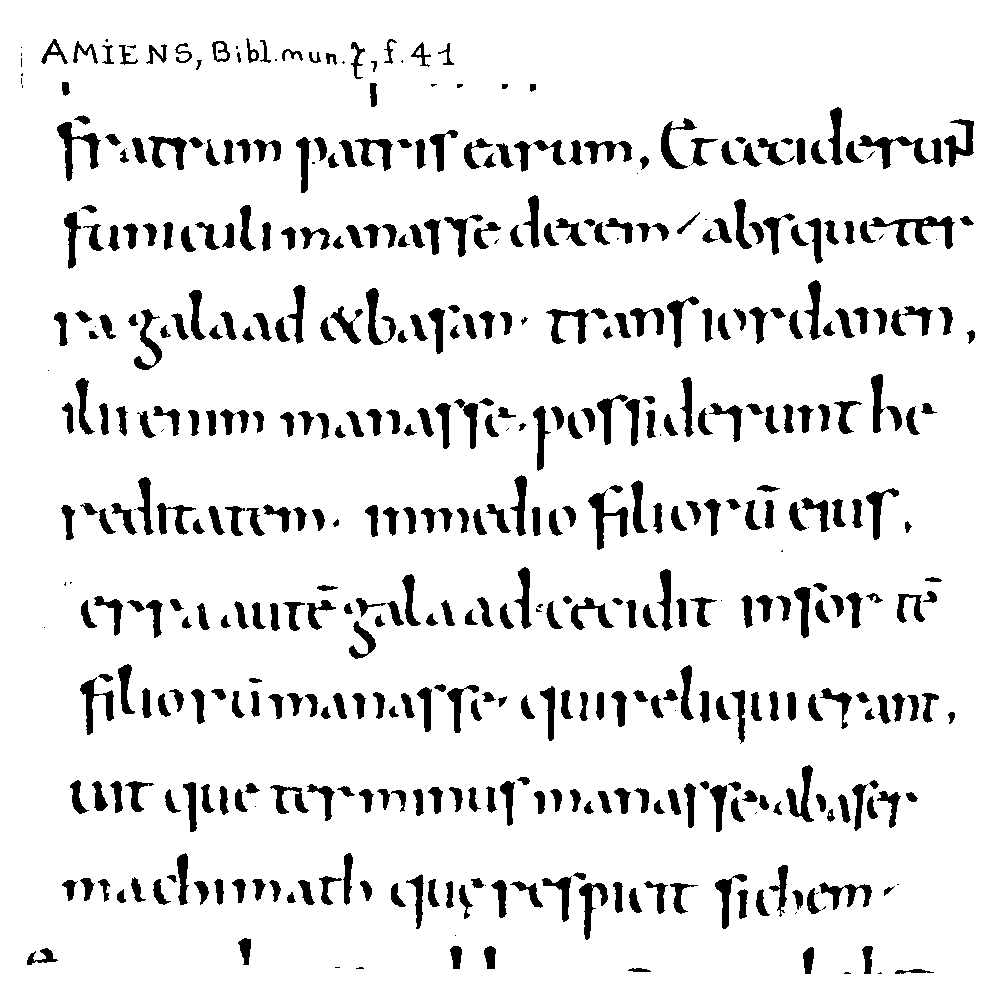


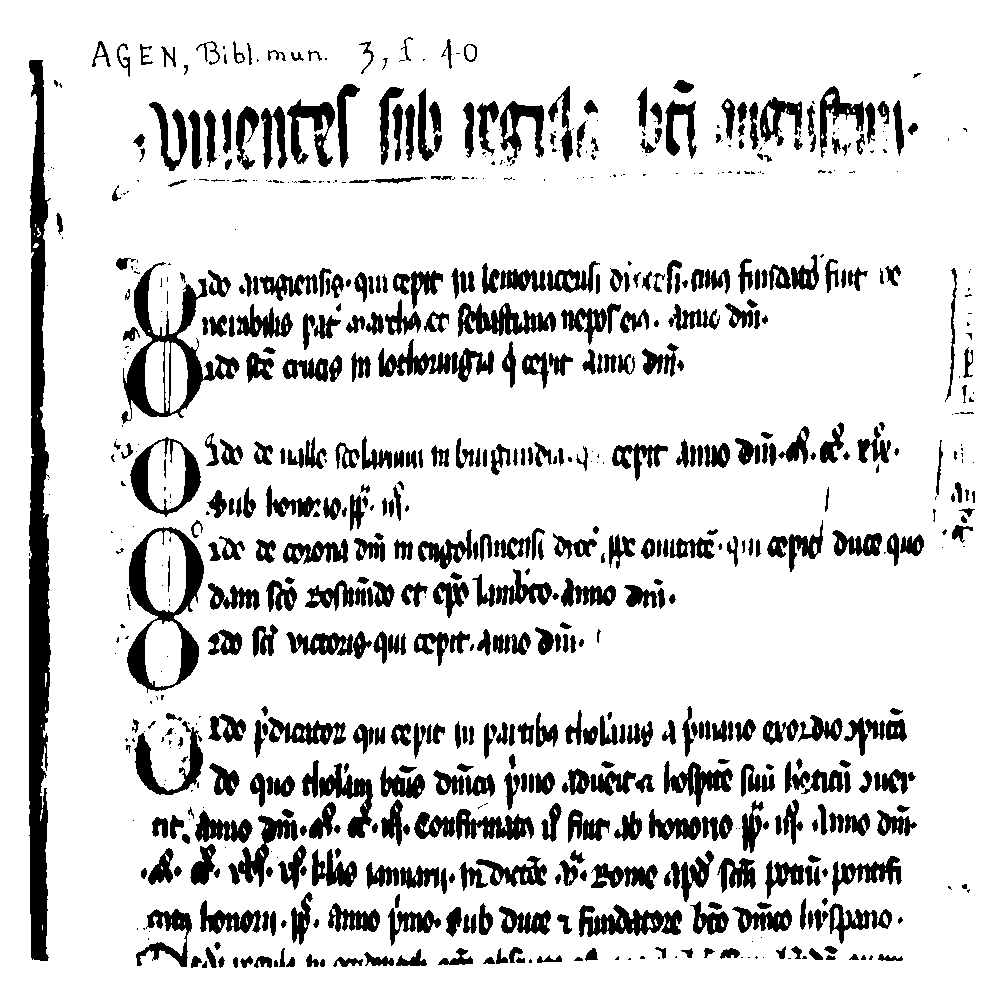
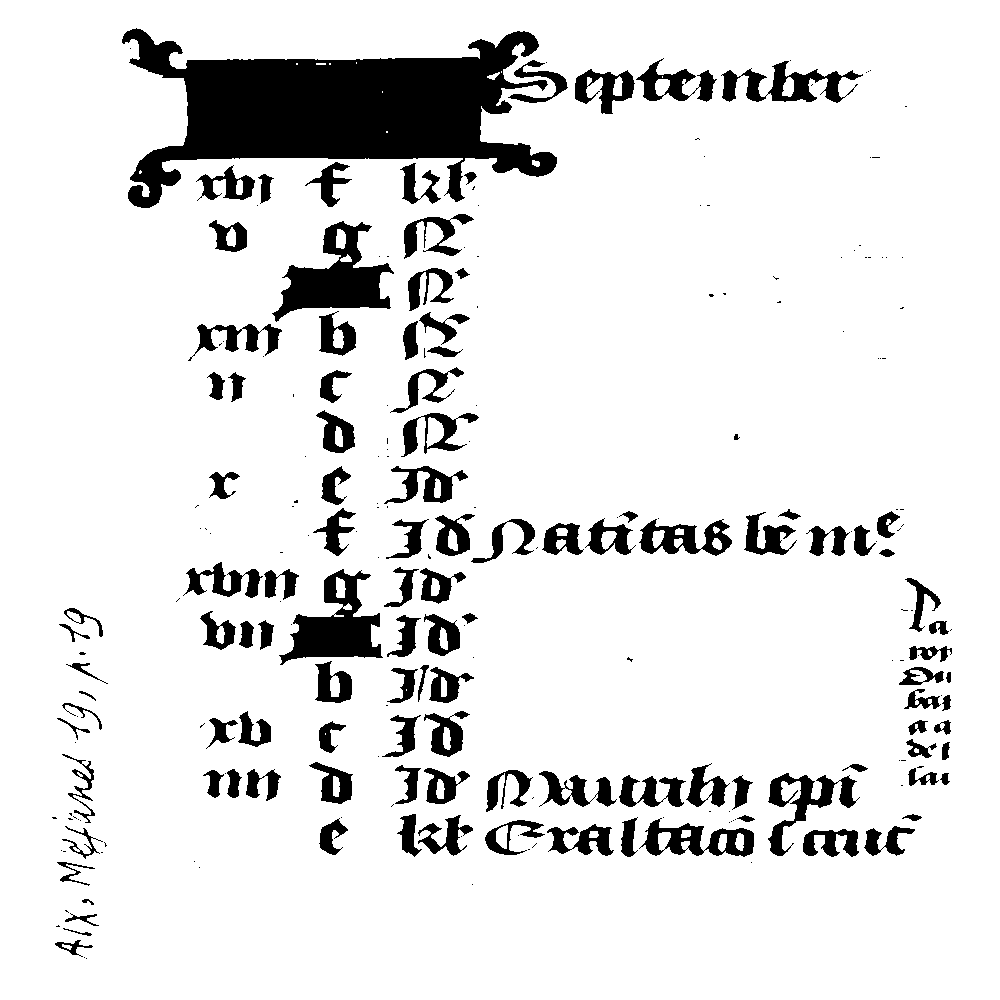
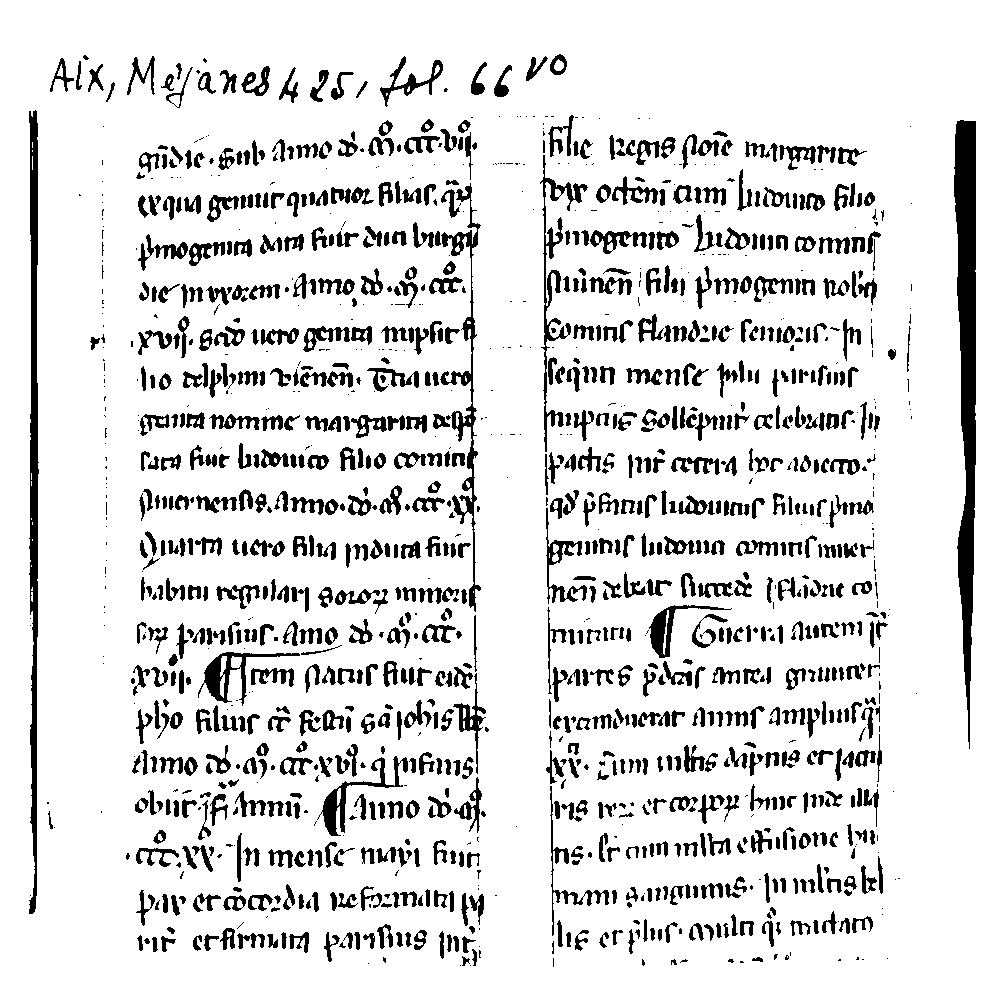
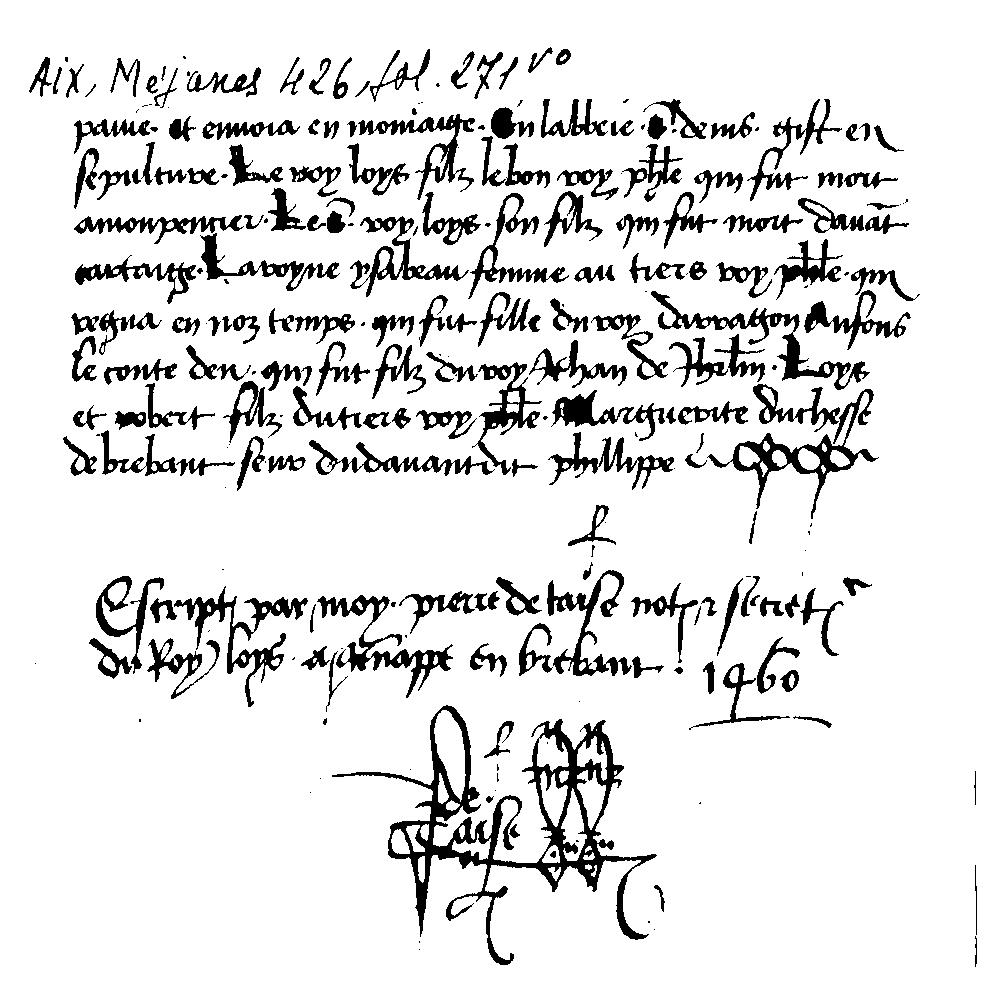
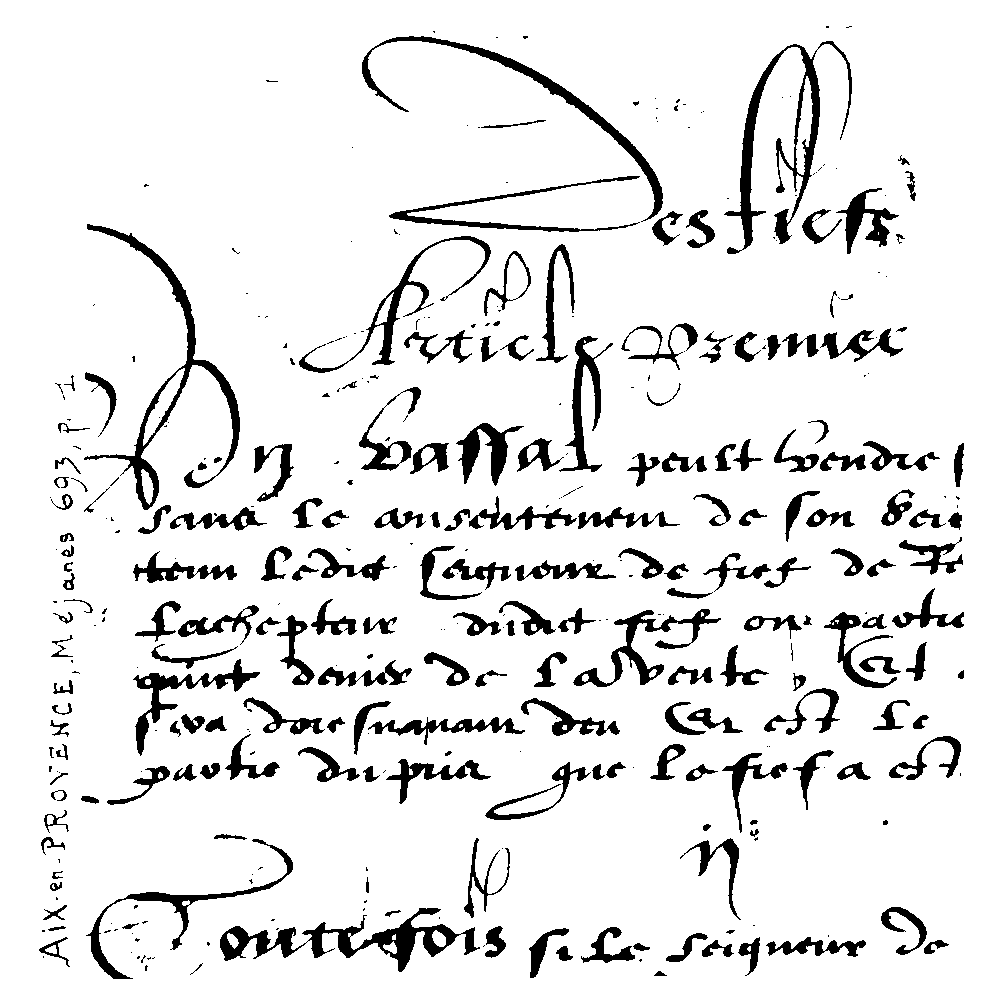
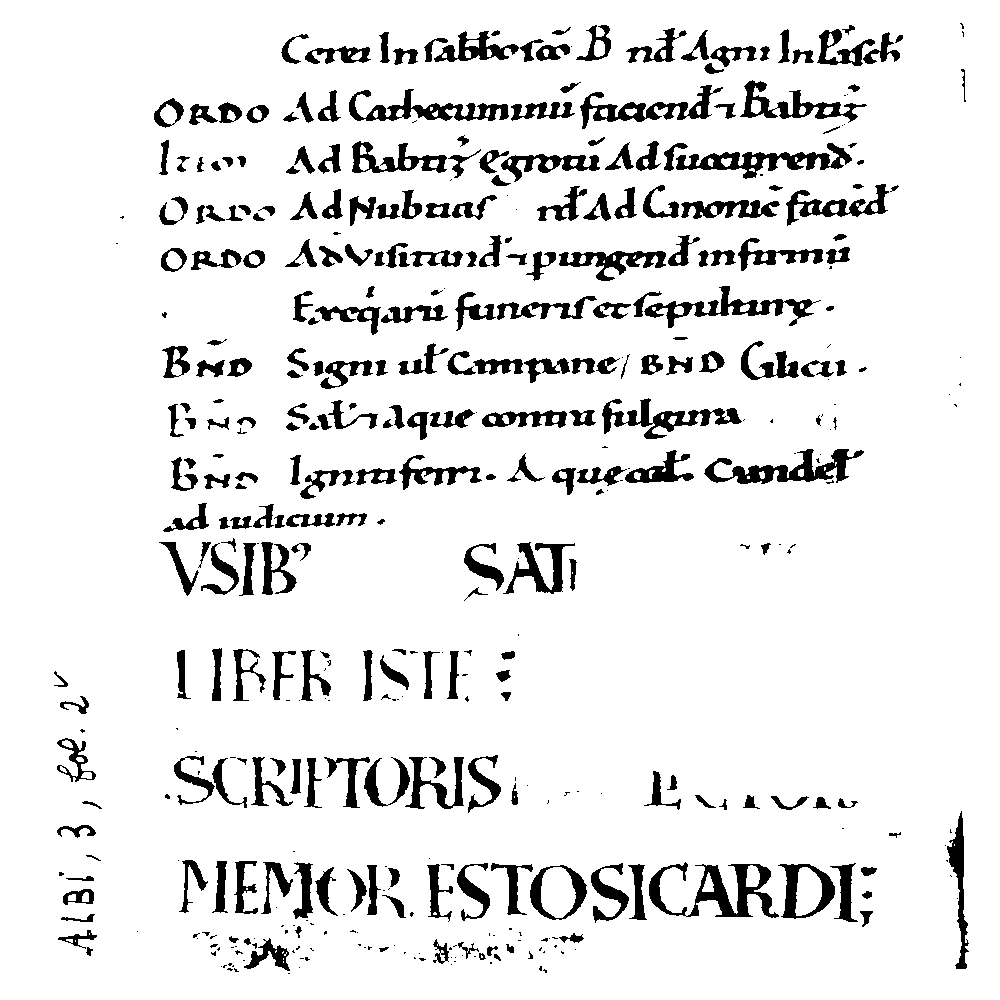
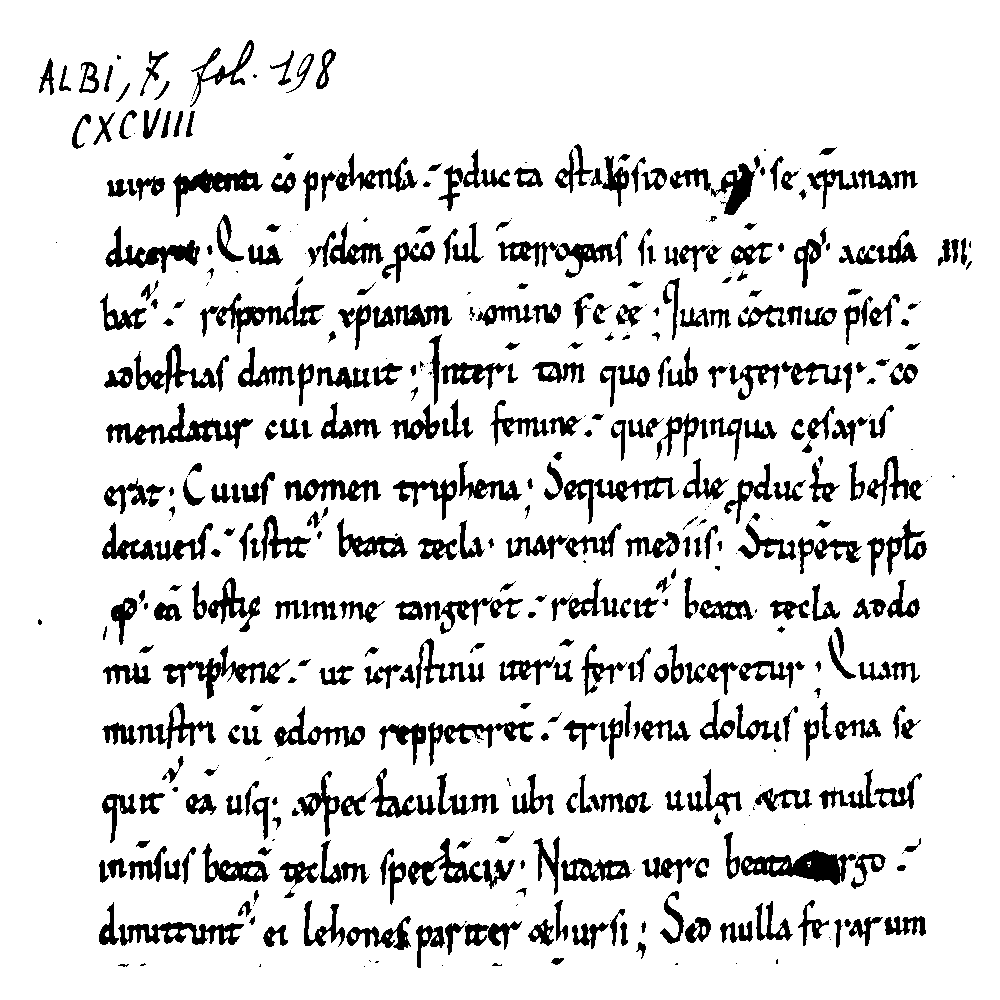
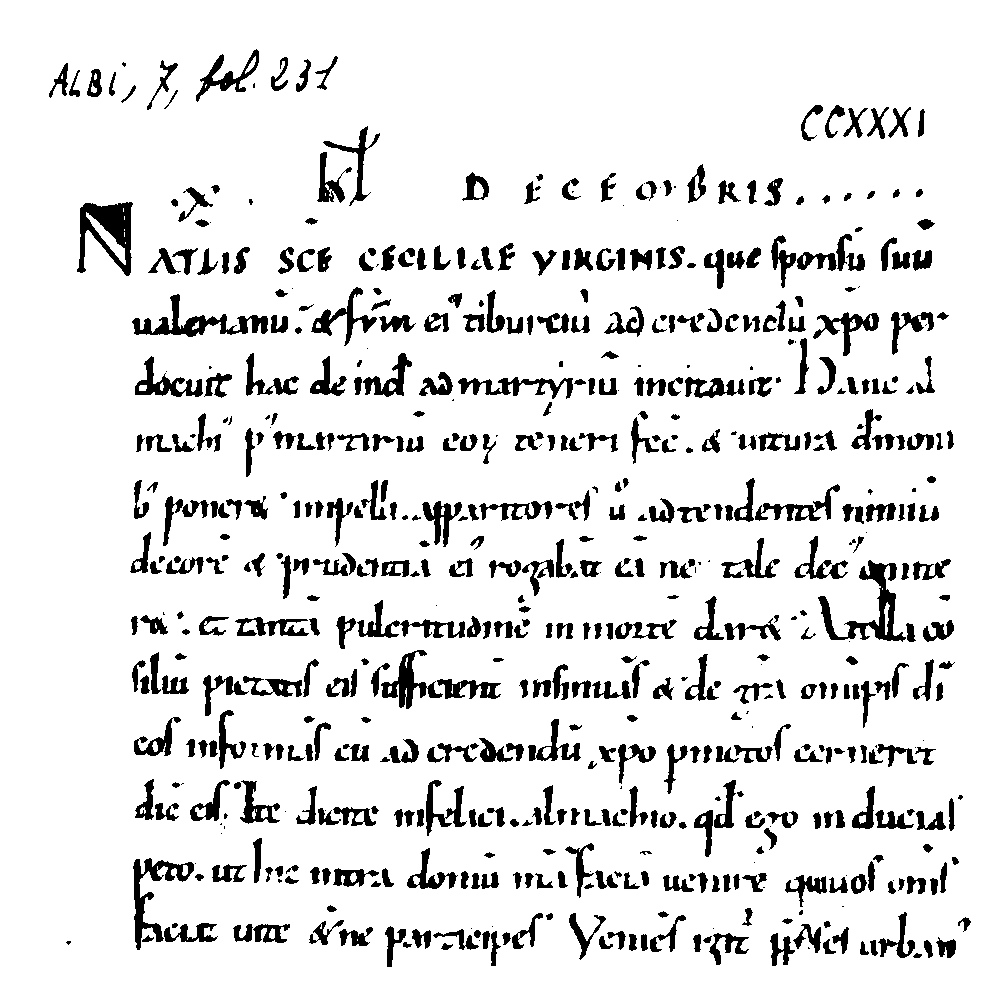
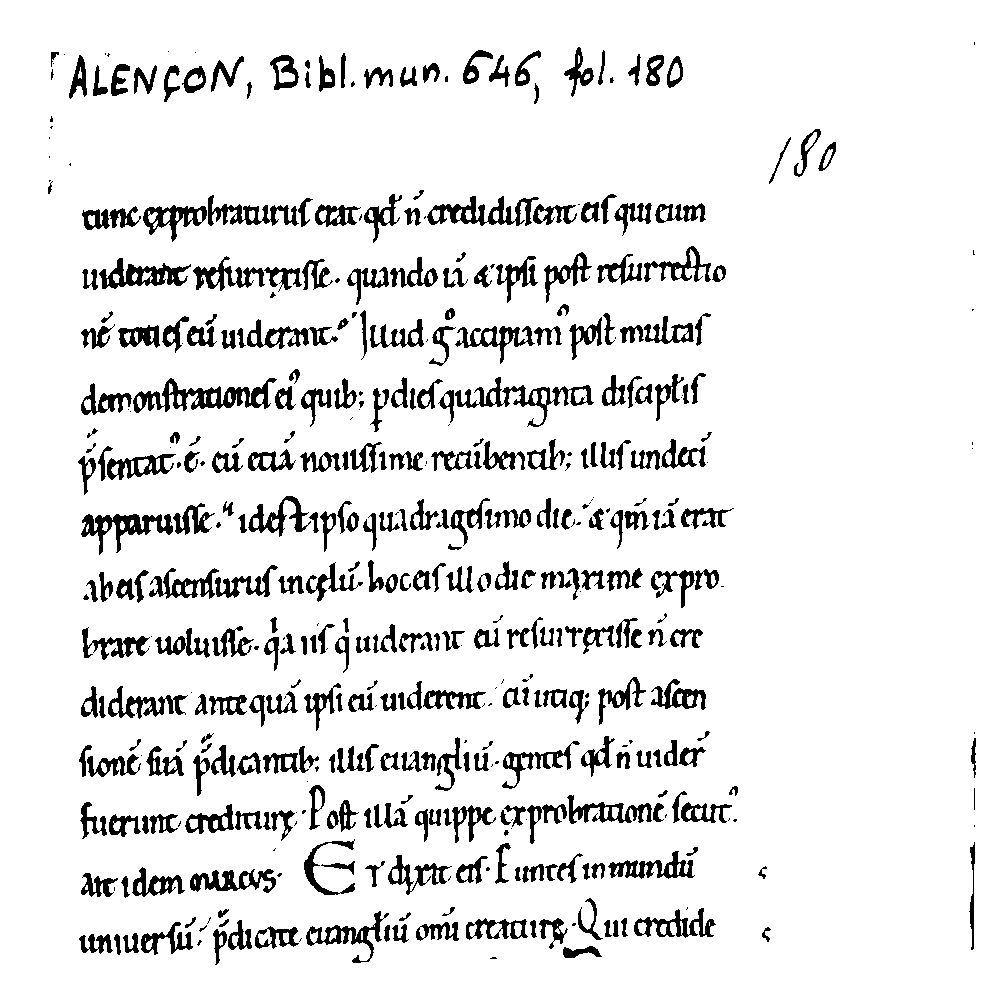
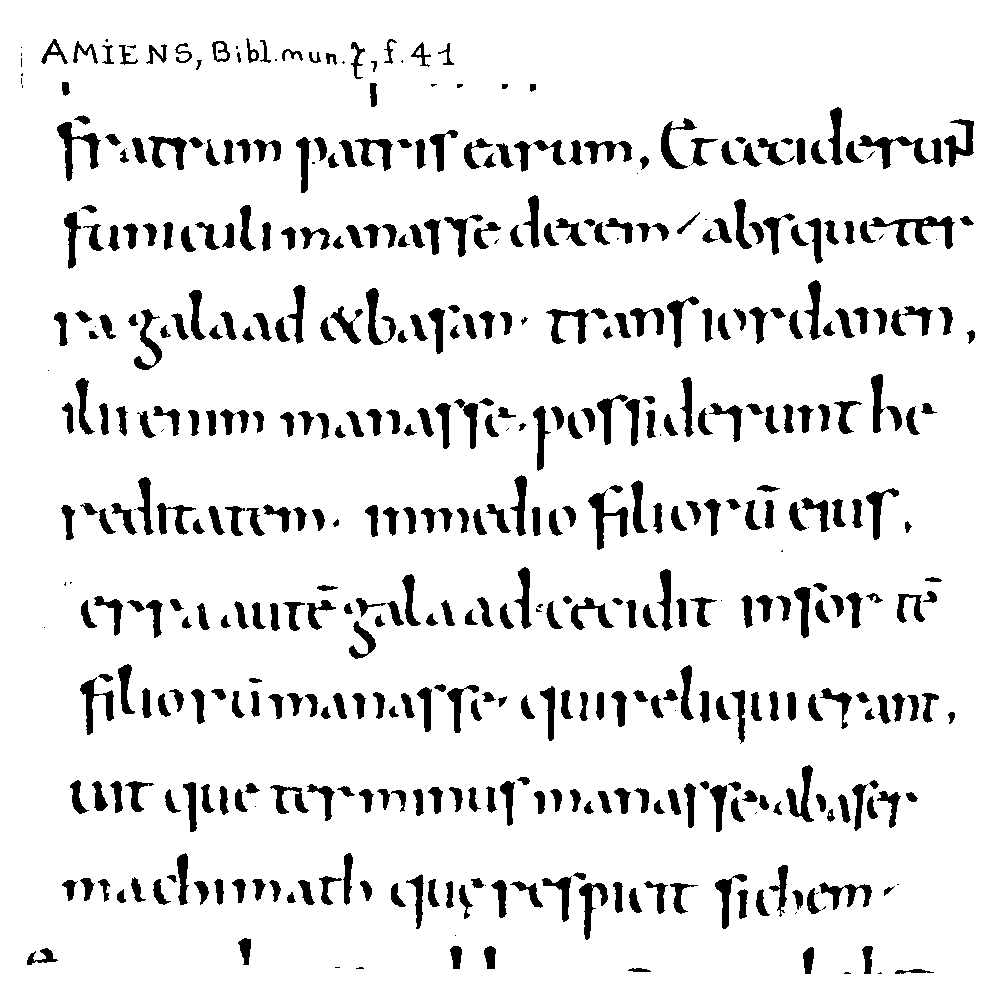

In [ ]:
# Whitespace check
bw_images = []
for i in images[:10]:
    cv_img = (i['im'] * 255).astype('uint8')
    cv_img = cv2.dilate(cv_img, (21, 21))
    th_im = cv2.threshold(cv_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#     th_im = cv2.adaptiveThreshold(cv_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
#     cv_img = cv2.medianBlur(cv_img, 3)
    bw_images.append(th_im)
labels = [np.sum(i) * 100 / (i.size * 255) for i in bw_images]
ipyplot.plot_images(bw_images, img_width=300, custom_texts=labels)

<AxesSubplot: >

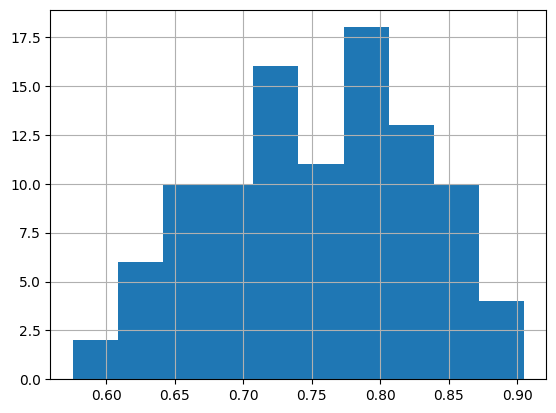

In [ ]:
pd.Series([i['im'].mean() for i in images]).hist()

In [ ]:
print(images[0])
print(font_group_map.get(images[0]['Script_type_ICDAR2017']))

{'ICDAR_CLAMM': 'Task_1_3', 'FILE_NAME': 'IRHT_P_005431.tif', 'Script_type_ICDAR2017': 9, 'DATE_ICDAR': 6, 'im': array([[0.98465329, 0.98157446, 0.97969463, ..., 0.99219266, 0.99438553,
        0.99224626],
       [0.98315397, 0.98050941, 0.98040299, ..., 0.99279705, 0.9933883 ,
        0.9921569 ],
       [0.97368113, 0.97785522, 0.97582982, ..., 0.99287048, 0.98922323,
        0.99362318],
       ...,
       [0.98246208, 0.98196317, 0.9901194 , ..., 0.99012384, 0.9948594 ,
        0.9960784 ],
       [0.98442057, 0.98400232, 0.98146406, ..., 0.99607842, 0.99607843,
        0.99607843],
       [0.98812087, 0.98537395, 0.97690698, ..., 0.99539616, 0.99607841,
        0.99607843]])}
Semitextualis


#### Data pre-processing

In [ ]:
(train_data, test_data, train_labels, test_labels) = train_test_split(
    [x.get('im').reshape(1000 * 1000) for x in images],
    [x.get('Script_type_ICDAR2017') for x in images],
    test_size=0.25,
    random_state=42
)

### Modeling
#### WIP

In [ ]:
# model = cluster.KMeans(n_clusters=len(font_group_map), max_iter=5)
# model.fit(train_data)
# metrics.accuracy_score(model.predict(test_data), test_labels)